In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from collections import Counter

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


# Introduction

The goal of this sprint is to perform simple exploratory data analysis of the MNIST dataset,
which is a set of matricies that are the the grayscale pixel values of handwritten digits and then
the label which is the number the digit actually is.

You are going to implement various functions responsible for returning information about the dataset.
Each function will have the inputs specified and what each input is supposed to be as well as the specificed 
intended output.
You will then have to plot results from the function in various ways to visualize your findings.


### Each function you have to implement is worth 20 points.
### There will be a total of 100 points.
### The 6th function to implement is extra credit worth 20 points

In [9]:
def least_common_digit(x_set, y_set):
    '''
       Input: x_set, the x values of the dataset and y_set, the y values of the  dataset
       Expected Output: The image from the x set of the least common digit.
    '''
    dic = {}
    leastIns = -1 #Number of instances
    value = 0 #Value
    
    for i,num in enumerate(y_set): #For loop through the label, or y-set
        if num not in dic: 
            dic[num] = 1 #initialize the number
        else:
            dic[num] += 1 #if in the dictionary ++1
        
    for i in range(len(dic)): #We go through the dictionary....
        if dic[i] < leastIns or leastIns == -1: #-1 tells if it is the first time or not
            leastIns = dic[i] #set the number of instances to the dic[i] value
            value = i #Set the value
            
    for i,num in enumerate(y_set):
        if num == value:
            return x_set[i]

lc_train = least_common_digit(x_train, y_train)
lc_test = least_common_digit(x_test, y_test)

In [10]:
def most_common_digit(x_set, y_set):
    '''
       Input: x_set, the x values of the dataset and y_set, the y values of the  dataset
       Expected Output: The image from the x set of the most common digit.
    '''
    dic = {}
    least = -1
    value = 0
    
    for i,num in enumerate(y_set):
        if num not in dic:
            dic[num] = 1
        else:
            dic[num] += 1
        
    for i in range(len(dic)):
        if dic[i] > least:
            least = dic[i]
            value = i
            
    for i,num in enumerate(y_set):
        if num == value:
            return x_set[i]

    
mc_train = most_common_digit(x_train, y_train)
mc_test = most_common_digit(x_test, y_test)

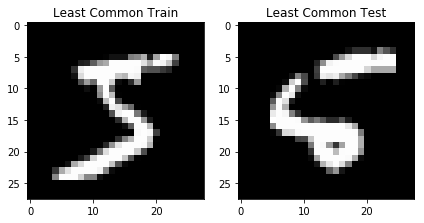

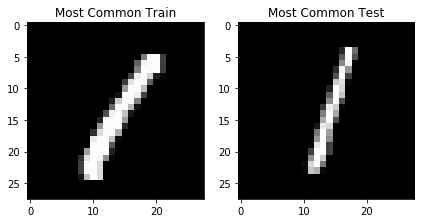

In [14]:
def plot_two(im1, title1, im2, title2):
    '''
        Input: im1, a matrix representing a grayscale image and title1 a string,im2 a matrix representing 
        a grayscale image and title2 a string
        Expected Output: A tuple (fig, ax) representing a generated figure from matplotlib and two subplots 
        ready to display the inputed images with the given titles
    '''
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(im1, cmap = 'gray')
    ax[0].set_title(title1)
    ax[1].imshow(im2, cmap = 'gray')
    ax[1].set_title(title2)
    fig.tight_layout()
    return (fig, ax)

plot_two(lc_train, 'Least Common Train', lc_test, 'Least Common Test')
plot_two(mc_train, 'Most Common Train', mc_test, 'Most Common Test')
plt.show()

In [26]:
def how_many_of_each_digit(y_set):
    '''
       Input: y_set, the y values of the training set
       Expected Output: A dict of the count of each digit in the set
    '''
    vals = {}
    
    for i, num in enumerate(y_set):
        if num not in vals:
            vals[num] = 1
        else:
            vals[num] += 1
    return vals

count_train = how_many_of_each_digit(y_train)
count_test = how_many_of_each_digit(y_test)

In [27]:
def bar_chart(train, test):
    '''
    Inputs: train, a dictionary of count of each digit of the training set and test, a dictionary of the count
    of each digit for the test set
    Expected Output: A tuple (fig, ax) ready to show using matplotlib
    '''
    fig, ax = plt.subplots(1,1)
    ax.bar(range(len(train)), train.values(), color = 'blue')
    ax.bar(range(len(test)), test.values(), color = 'red')
    return (fig, ax)

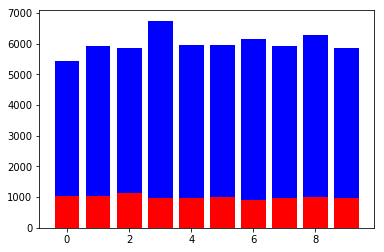

In [28]:
fig, chart = bar_chart(count_train, count_test)
plt.show()

## Finally for extra credit after doing the small data explorations above, using the data provided here or if you are feeling particularly fancy download a dataset from somewhere and make an interesting visualization of something you think would be important to know if you were exploring this dataset in a real world setting.

### This is extra credit and worth 20points.

In [67]:
import matplotlib.pyplot as plt
#A dictionary with all the numbers and instances of the numbers
#Least common, most common number

def interesting_visualization():
    # Data to plot
    count_train = how_many_of_each_digit(y_train) #Dictionary    
    labels = 'Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine'
    sizes = []
    for i in range(10):
        sizes.append(count_train[i])
    colors = ['gray','gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue', 'pink', 'orange', 'red', 'green']
    #explode = (0.1, 0, 0, 0, 0,0,0,0,0)  # explode 1st slice

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Training Data")
    plt.axis('equal')
    plt.show()

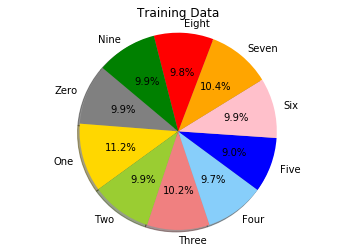

In [68]:
interesting_visualization()